<a href="https://colab.research.google.com/github/JarvisSan22/JC_learn_python_Notebooks/blob/main/Mist_Image_Genorator_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports 

In [2]:
from random import random
from math import ceil

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense, Conv2D, MaxPooling2D, Flatten, SimpleRNN
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image 
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.utils.vis_utils import plot_model
import numpy as np
from keras.datasets import mnist

In [3]:
data=mnist.load_data()[0][0]

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
data.shape

(60000, 28, 28)

In [5]:
class ImageIterator(object):
  def __init__(self, data, batch_size, random=False):
    print(len(data))
    self.data = data
    self._i=0
    self.batch_size= batch_size
    self.random=random
  def _iter__(self):
    return self

  def __next__(self):
    if self._i == len(self.data):
      raise StopIteration()
   
    if self.random:
        np.random.seed=42
        random_index=np.random.randint(0,len(self.data),self.batch_size)
       # print(random_index)
        data_batch=self.data[random_index]
        self._i+=self.batch_size

    else:
      data_batch=self.data[self._i:self._i+self.batch_size]
      self._i+=self.batch_size
    return data_batch



In [6]:
mnist_interator=ImageIterator(data,batch_size=20,random=True)

60000


(20, 28, 28)


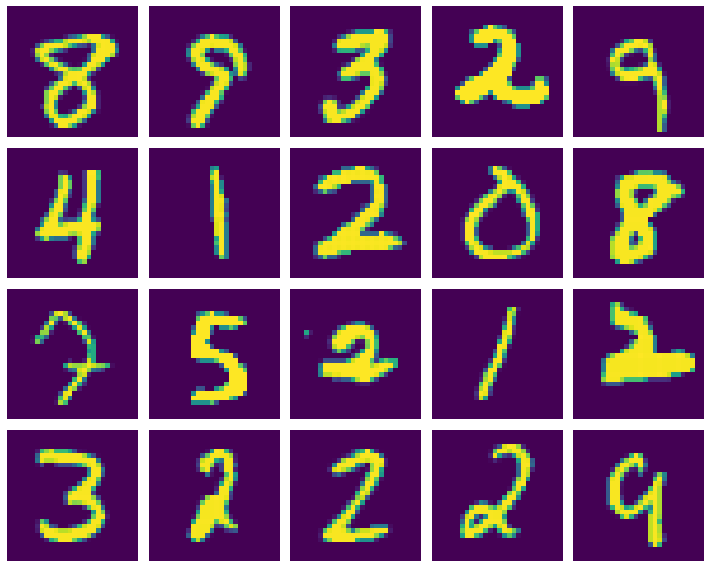

In [26]:
def PlotImages(data,ncols=5):
  dims=data.shape
  print(dims)
  N=dims[0]
  aspect_ratio = dims[1] /dims[2]
  nrows=N//ncols
  if nrows % 2 ==1:
    nrows+=1
  fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(2 * ncols * aspect_ratio, 2 * nrows))
  for idx in range(0,N):
    ax= axs[idx// ncols][idx % ncols]
    if len(dims)>3:
      if dims[~0]==1:
        ax.imshow(data[idx][:,:,0])
      else:
        ax.imshow(data[idx])
    else:
      ax.imshow(data[idx])
    ax.axis(False)
  plt.tight_layout()

PlotImages(mnist_interator.__next__()) 



# Keras data generator

In [27]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
 #Define Generator 

dims=data.shape
train_generator = datagen.flow(  #Create data flow for interation
    data.reshape(dims[0],dims[1],dims[2],1),
    batch_size=20,
    shuffle=True #randomizes data on each epoch 
)



(20, 28, 28, 1)


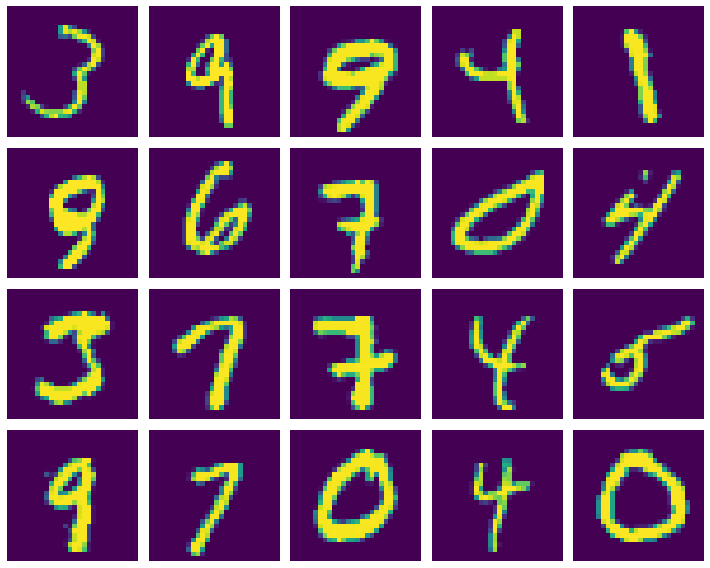

In [28]:
PlotImages(train_generator.__next__()) 

In [29]:
train_generator.__next__().shape

(20, 28, 28, 1)